# Обработка результатов эксперимента 

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
df=pd.read_csv('saved.csv',header=None,names=['duration','comment'])
df

,duration,comment
0,12.083284,run #4. cache on
1,11.651030,run #3. cache off
2,11.335891,run #3. cache on
3,12.668044,run #2. cache off
4,12.292129,run #2. cache on
5,12.038498,run #1. cache off
6,12.001668,run #1. cache on


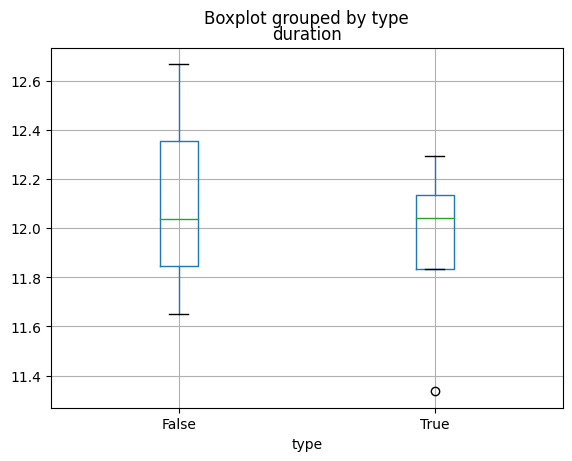

In [8]:
df['type']=df.comment.str.contains("cache on")
df.boxplot(column='duration',by='type');

Возможно, кеширование обеспечивает некоторую стабильность скорости сборки.

## Cтрогое тестирование гипотезы. 
Для малых выборок используем непараметрический тест  - U-критерий Манна-Уитни

In [4]:
on=df[df.comment.str.contains("cache on")].duration
off=df[df.comment.str.contains("cache off")].duration

In [5]:
stats.mannwhitneyu(off, on, alternative='greater')

MannwhitneyuResult(statistic=7.0, pvalue=0.42857142857142855)

pvalue > 0.05 

## Вывод: нет достаточных оснований считать полезной эффективность кеширования сборки для исследуемого приложения  

Очевидно, это противоречит сути настройки кеширования в gitlab. 
Но объясняет почему во многих случаях эффект как будто бы не был заметен.  

В приложениях большего размера ситуация должна поменяться.